## Depthwise Separable Convolution(깊이별 분리 합성곱)


* 입력 채널별로 따로 공간 방향의 컨볼루션 진행

* 공간상 데이터가 상관관계가 크고, 채널별 데이터는 독립적이라고 가정할 때 효율적

In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
import tensorflow.keras
from tensorflow.keras import activations


(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')/255.
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')/255.

y_train = tensorflow.keras.utils.to_categorical(y_train, 100)
y_test = tensorflow.keras.utils.to_categorical(y_test, 100)

In [2]:
# model 1 : Sepaarable convolution

model1 = Sequential()

model1.add(layers.SeparableConv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3), activation=activations.relu))
model1.add(BatchNormalization())
model1.add(layers.SeparableConv2D(64, (3, 3), padding="same", activation=activations.relu))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.SeparableConv2D(128, (3, 3), padding="same", activation=activations.relu))
model1.add(BatchNormalization())
model1.add(layers.SeparableConv2D(256, (3, 3), padding="same", activation=activations.relu))
model1.add(BatchNormalization())
model1.add(GlobalAveragePooling2D())

model1.add(Dense(512, activation=activations.relu))
model1.add(Dropout(0.4))
model1.add(Dense(100, activation=activations.softmax))

model1.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
                    batch_size=128,
                    epochs=40,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/40
391/391 - 8s - loss: 3.6308 - accuracy: 0.1436 - val_loss: 5.4322 - val_accuracy: 0.0179
Epoch 2/40
391/391 - 8s - loss: 2.9448 - accuracy: 0.2628 - val_loss: 2.8795 - val_accuracy: 0.2688
Epoch 3/40
391/391 - 8s - loss: 2.6121 - accuracy: 0.3263 - val_loss: 2.5672 - val_accuracy: 0.3397
Epoch 4/40
391/391 - 8s - loss: 2.3851 - accuracy: 0.3737 - val_loss: 2.7459 - val_accuracy: 0.3210
Epoch 5/40
391/391 - 8s - loss: 2.2080 - accuracy: 0.4090 - val_loss: 2.3309 - val_accuracy: 0.3878
Epoch 6/40
391/391 - 8s - loss: 2.0757 - accuracy: 0.4445 - val_loss: 2.1341 - val_accuracy: 0.4353
Epoch 7/40
391/391 - 8s - loss: 1.9596 - accuracy: 0.4668 - val_loss: 2.1566 - val_accuracy: 0.4337
Epoch 8/40
391/391 - 8s - loss: 1.8632 - accuracy: 0.4909 - val_loss: 1.9990 - val_accuracy: 0.4643
Epoch 9/40
391/391 - 8s - loss: 1.7737 - accuracy: 0.5108 - val_loss: 2.0956 - val_accuracy: 0.4484
Epoch 10/40
391/391 - 8s - loss: 1.6976 - accuracy: 0.5300 - val_loss: 1.8959 - val_accuracy: 0.4902

In [3]:
# model 2 : normal convolution

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3), activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Conv2D(256, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation=activations.relu))
model2.add(Dropout(0.4))
model2.add(Dense(100, activation=activations.softmax))

model2.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=128,
                    epochs=40,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/40
391/391 - 10s - loss: 4.5350 - accuracy: 0.0418 - val_loss: 4.2602 - val_accuracy: 0.0555
Epoch 2/40
391/391 - 9s - loss: 4.0909 - accuracy: 0.0704 - val_loss: 4.2332 - val_accuracy: 0.0710
Epoch 3/40
391/391 - 9s - loss: 3.8665 - accuracy: 0.0908 - val_loss: 3.5631 - val_accuracy: 0.1397
Epoch 4/40
391/391 - 9s - loss: 3.6673 - accuracy: 0.1154 - val_loss: 3.2495 - val_accuracy: 0.2045
Epoch 5/40
391/391 - 9s - loss: 3.4723 - accuracy: 0.1444 - val_loss: 3.1633 - val_accuracy: 0.2225
Epoch 6/40
391/391 - 9s - loss: 3.2967 - accuracy: 0.1714 - val_loss: 2.8747 - val_accuracy: 0.2673
Epoch 7/40
391/391 - 9s - loss: 3.1057 - accuracy: 0.2050 - val_loss: 2.8394 - val_accuracy: 0.2734
Epoch 8/40
391/391 - 9s - loss: 2.9198 - accuracy: 0.2447 - val_loss: 2.6191 - val_accuracy: 0.3264
Epoch 9/40
391/391 - 9s - loss: 2.7024 - accuracy: 0.2858 - val_loss: 2.5789 - val_accuracy: 0.3300
Epoch 10/40
391/391 - 9s - loss: 2.5134 - accuracy: 0.3240 - val_loss: 2.3953 - val_accuracy: 0.378

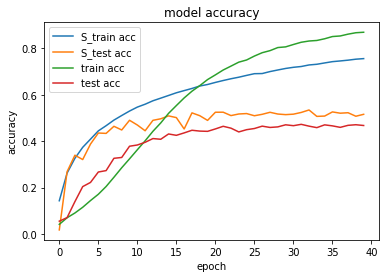

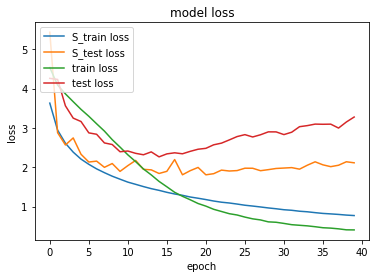

In [4]:
import matplotlib.pyplot as plt


plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['S_train acc', 'S_test acc', 'train acc', 'test acc'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['S_train loss', 'S_test loss', 'train loss', 'test loss'], loc='upper left')
plt.show()

* 실험 결과 SeparableConv를 사용한 모델의 성능이 더 높게 나온것을 확인.


* 간혹 학습이 안되는 경우가 있었음